In [12]:
from datascience import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# 9 Randomness

- `numpy` 中有子模块 `random`
- `np.random.choice(array_name)`
    - 随机返回数组 `array_name` 中的任一元素（等概率）
    - 还可以添加加第二个参数，指定 roll 的次数（此时返回一个数组）

In [10]:
two_groups = make_array('treatment', 'control')
np.random.choice(two_groups)

'treatment'

In [11]:
np.random.choice(two_groups, 10)

array(['control', 'control', 'control', 'control', 'treatment',
       'treatment', 'control', 'treatment', 'treatment', 'treatment'],
      dtype='<U9')

### 9.0.1 Booleans and Comparison

- 有 Boolean values: `True`, `False`

In [13]:
1 < 1 + 1 < 3

True

### 9.0.2 Comparing Strings

In [14]:
'Dog' > 'Catastrophe' > 'Cat'

True

### 9.0.3 Comparing an Array and a Value

- 逐个比较，返回 boolean 数组
- `np.count_nonzero()` 返回一个数组中非零元素的个数（或 `True` 的个数）

In [15]:
tosses = make_array('Tails', 'Heads', 'Tails', 'Heads', 'Heads')
tosses == 'Heads'

array([False,  True, False,  True,  True])

In [16]:
np.count_nonzero(tosses == 'Heads')

3

---

## 9.1 Conditional Statements

### 9.1.1 The General Form

- multi-clause conditional statement 的一般形状
    ```
    if <if expression>:
        <if body>
    elif <elif expression 0>:
        <elif body 0>
    elif <elif expression 1>:
        <elif body 1>
    ...
    else:
        <else body>
    ```


In [20]:
def sign(x):
    if x > 0:
        return 'Positive'
    elif x < 0:
        return 'Negative'
    else:
        return 'Neither positive nor negative'
    
print(sign(-3))   # 没有定义 x < 0 的行为之前，这可以被运行，只是什么也没有返回
print(sign(0))

Negative
Neither positive nor negative


---

## 9.2 Iteration

- for 语句

In [22]:
for animal in make_array('cat', 'dog', 'rabbit'):
    print(animal)

cat
dog
rabbit


In [23]:
# 上一个 for 语句等价于
animal = make_array('cat', 'dog', 'rabbit').item(0)
print(animal)
animal = make_array('cat', 'dog', 'rabbit').item(1)
print(animal)
animal = make_array('cat', 'dog', 'rabbit').item(2)
print(animal)

cat
dog
rabbit


In [29]:
# 例：simulating the results of betting five times on the die
def bet_on_one_roll():
    x = np.random.choice(np.arange(1, 7))
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <=6:
        return 1
    
# roll 5 次
for i in np.arange(5):
    print(bet_on_one_roll())

-1
-1
0
1
0


### 9.2.1 Augmenting Arrays

- `np.append(array_name, value)`
    - 将 item `value` 添加到数组 `array_name` 末尾，返回一个 array
    - 保持 `array_name` 不变

In [33]:
pets = make_array('Cat', 'Dog')
np.append(pets, 'Another Pet')

array(['Cat', 'Dog', 'Another Pet'], dtype='<U11')

In [34]:
pets

array(['Cat', 'Dog'], dtype='<U3')

### 9.2.2 Examples

In [44]:
# Example 1: Betting on 5 Rolls
outcomes = make_array()
for i in np.arange(5):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
outcomes

array([-1.,  0., -1., -1.,  1.])

In [45]:
np.count_nonzero(outcomes)

4

In [47]:
# Example 2: Betting on 300 Rolls
outcomes = make_array()
for i in np.arange(300):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
len(outcomes)

300

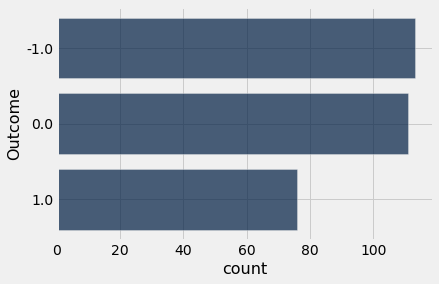

In [58]:
# 考虑打标统计
outcome_tbl = Table().with_column(
    'Outcome', outcomes
)
outcome_tbl.group('Outcome').barh(0)

---

## 9.3 Simulation

### 9.3.2 Example: Number of Heads in 100 Tosses

In [68]:
coin = make_array('Heads', 'Tails')

def one_simulated_value():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'Heads')

num_repetitions = 20000
heads = make_array()      # 先造一个空数组用于存放结果
for i in np.arange(num_repetitions):
    new_value = one_simulated_value()
    heads = np.append(heads, new_value)
    
len(heads)  # check 一下

20000

Repetition,Number of Heads
1,53
2,50
3,43


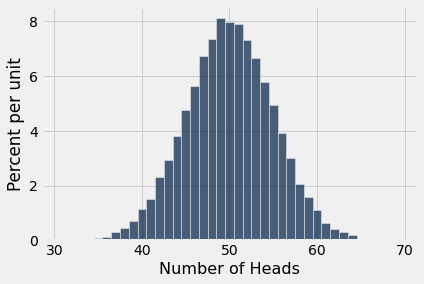

In [71]:
# 考虑将模拟的结果放入一表
simulation_results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)
simulation_results.show(3)

# 作出直方图
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))

### 9.3.3 Example: Moves in Monopoly

- 来模拟两个筛子

In [73]:
# 模拟 1 次
die = np.arange(1, 7)
sum(np.random.choice(die, 2))

10

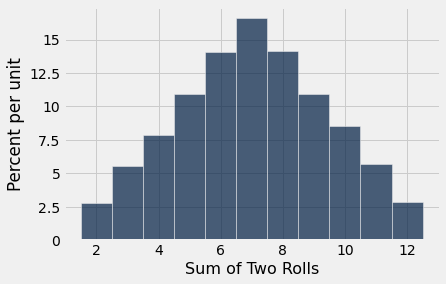

In [76]:
# 模拟 10000 次
def one_simulated_move():
    return sum(np.random.choice(die, 2))

num_repetitions = 10000
moves = make_array()
for i in np.arange(num_repetitions):
    new_move = one_simulated_move()
    moves = np.append(moves, new_move)
    
results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Sum of Two Rolls', moves
)
results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1))

---

## EX

### hw05

- If you want to apply a function that takes in multiple arguments, you can pass multiple column names as arguments in `tbl.apply()`. The column values will be passed into the corresponding arguments of the function. 
- You can use `tbl.row(n)` to get the nth row of a table. `row.item("column_name")` will allow you to select the element that corresponds to `column_name` in a particular row. 
- When you only pass a function name and no column labels through `tbl.apply()`, the function gets applied to every row in `tbl`

### lab05

- Table method `sample()` 从表中 roll 特定的列数，例如 
    ```python
    salary_data.sample(5)
    ```
    - 默认参数为 tbl 的 `num_rows`
    - 默认情况从表中抽取、替换 （允许重复）
    - 若不替换则添加可选参数 `with_replacement=False` （不允许重复）


In [86]:
test_tbl = Table().with_column('value', make_array(1, 2, 3, 4, 5))
test_tbl.sample(4).show()
test_tbl.sample().show()
test_tbl.sample(with_replacement=False).show()

value
2
4
4
2


value
2
5
2
4
5


value
4
2
1
5
3
